<a href="https://colab.research.google.com/github/Siriyaphorn/colab-machine-learning/blob/main/ploynomial%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

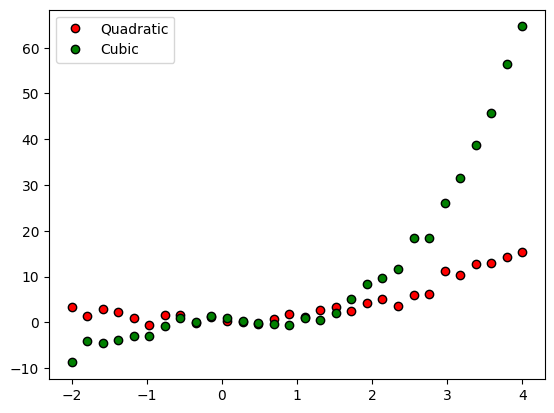

In [4]:
## generate the data
n=30
x=np.linspace(-2,4,n)
y1=x**2 + np.random.randn(n)
y2=x**3 + np.random.randn(n)

#plot the data
plt.plot(x,y1,'ko',markerfacecolor='r')
plt.plot(x,y2,'ko',markerfacecolor='g')
plt.legend(('Quadratic','Cubic'))

[0.91139538 0.23255279 0.23886834]


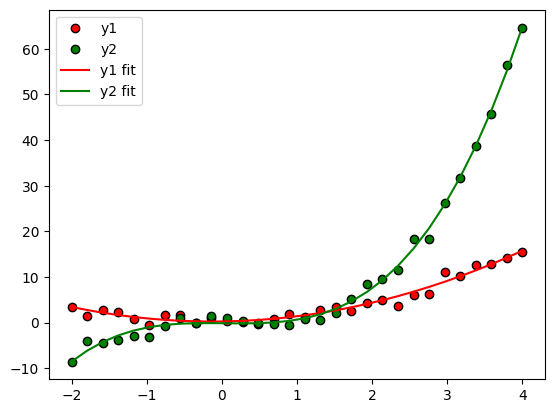

In [5]:
## now for a polynomial fit
#for y1
pterms = np.polyfit(x,y1,2)
yHat1 = np.polyval(pterms,x)
print(pterms)

## % for y2
pterms = np.polyfit(x,y2,3)
yHat2 = np.polyval(pterms,x)

## and all the plotting
plt.plot(x,y1,'ko',markerfacecolor='r' ,label='y1')
plt.plot(x,y2,'ko',markerfacecolor='g' ,label='y2')

plt.plot(x,yHat1,'r',label='y1 fit')
plt.plot(x,yHat2,'g',label='y2 fit')
plt.legend()


In [8]:
# compute R2

#compute R2 for several  polymial orders
orders = np.arange(1,6)

#output matrices
r2 = np.zeros((2,len(orders)))
sse = np.zeros((2,len(orders)))

# the loop!
for oi in range(len(orders)):
    # fit the model with oi terms
    pterms = np.polyfit(x,y1,orders[oi])
    yHat = np.polyval(pterms,x)

    # compute R2
    ss_eta = sum((y1-yHat)**2) #numerator
    ss_tot = sum((y1-np.mean(y1))**2) #denominator
    r2[0,oi] = 1-ss_eta/ss_tot #R^2
    sse[0,oi] = ss_eta # store just the SSe for model comparison later

    ### repeat for y2
    pterms = np.polyfit(x,y2,orders[oi])
    yHat = np.polyval(pterms,x)
    ss_eta = sum((y2-yHat)**2)
    ss_tot = np.var(y2)*(n-1)
    r2[1,oi] = 1-ss_eta/ss_tot
    sse[1,oi] = ss_eta

Text(0, 0.5, 'Model BIC')

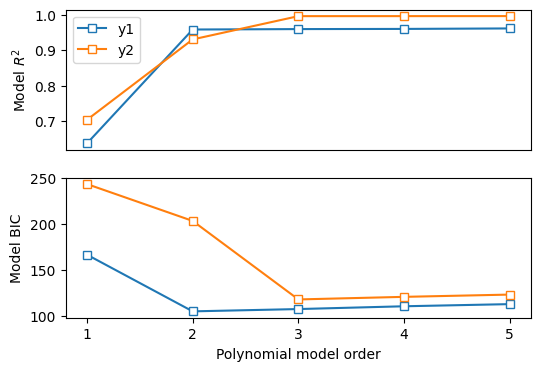

In [11]:
fig,ax = plt.subplots(2,1,figsize=(6,4))

#plot the R2 results
ax[0].plot(orders,r2[0,:],'s-',markerfacecolor='w')
ax[0].plot(orders,r2[1,:],'s-',markerfacecolor='w')
ax[0].set_ylabel('Model $R^2$')
ax[0].set_xticks([])
ax[0].legend(('y1','y2'))

# compute the Bayes Information Criterion
bic = n*np.log(sse) + orders*np.log(n)
ax[1].plot(orders,bic[0,:],'s-',markerfacecolor='w')
ax[1].plot(orders,bic[1,:],'s-',markerfacecolor='w')
ax[1].set_xlabel('Polynomial model order')
ax[1].set_xticks(range(1,6))
ax[1].set_ylabel('Model BIC')

#optional_zoom
#ax[1].set_ylim([90,120])